<a href="https://colab.research.google.com/github/SYJOO99/GNUVILL_AI/blob/main/GNUVILL_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%8A%A4%ED%84%B0%EB%94%94(%EC%A4%91%EA%B8%89)_6%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GNUVILL 인공지능 스터디(중급) 6주차 실습: 로지스틱 회귀

---





유방암 데이터 분석

로지스틱 회귀 역시 대표적인 지도학습 유형의 분석 기법으로 선형 회귀와 다르게 값을 예측하는 것이 아니라 클래스를 예측 및 분류하는 기법이다. (**참/거짓**의 이진 분류)

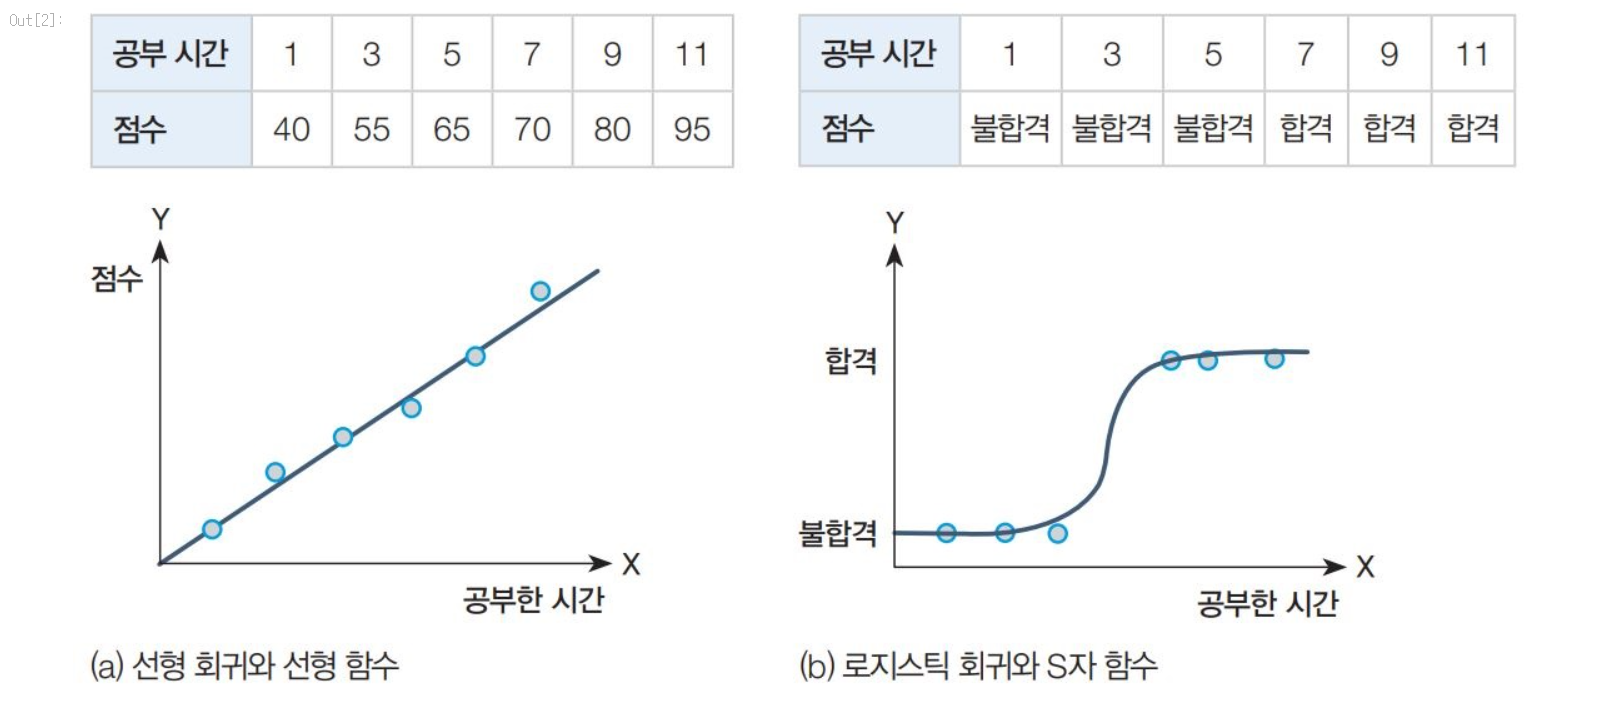

---

##1. 라이브러리

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

## 2. 데이터 준비하기

In [3]:
# 유방암 데이터 불러오기
b_cancer = load_breast_cancer()
#b_cancer
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
# 유방암 데이터를 특성 이름을 열로 하는 데이터프레임으로 저장
b_cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)

# 'diagnosis' 열을 y, 타겟 데이터로 설정
b_cancer_df['diagnosis'] = b_cancer.target

# 데이터 크기 출력
print(b_cancer_df.shape)

(569, 31)


In [5]:
b_cancer_df

mean radius  mean texture  ...  worst fractal dimension  diagnosis
0          17.99         10.38  ...                  0.11890          0
1          20.57         17.77  ...                  0.08902          0
2          19.69         21.25  ...                  0.08758          0
3          11.42         20.38  ...                  0.17300          0
4          20.29         14.34  ...                  0.07678          0
..           ...           ...  ...                      ...        ...
564        21.56         22.39  ...                  0.07115          0
565        20.13         28.25  ...                  0.06637          0
566        16.60         28.08  ...                  0.07820          0
567        20.60         29.33  ...                  0.12400          0
568         7.76         24.54  ...                  0.07039          1

[569 rows x 31 columns]



*   **.info()**:데이터의 통계 정보 확인





In [6]:
# 통계 정보 확인
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 3. 데이터 전처리

독립변수로 사용할 데이터를 평균이 0, 분산이 1이되는 정규분포 형태로 수정

스케일링(전처리)을 통해 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

*   **sklearn.preprocessing**: 데이터 스케일링, 변환을 담당하는 패키지
*   **StandardScaler**
  :평균을 제거하고 데이터를 단위 분산으로 조정.
  
그러나 StandardScaler의 경우 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

**따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.**



*   **scaler.fit_transform**: scaler의 단축 메서드로 학습용 데이터에 적용.
  
  fit으로 데이터 변환을 학습하고, transform으로 실제 데이터의 스케일을 조정





In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#유방암 데이터에 대해 scaler.fit_transform 사용
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [8]:
b_cancer_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [9]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


## 4. 로지스틱 회귀 모형 구축

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
# X, Y 설정
# Y는 유방암 데이터 데이터프레임의 'diagnosis'열
Y = b_cancer_df['diagnosis']
# X는 정규분포에 따라 스케일링된 데이터
X = b_cancer_scaled

In [12]:
# 훈련용, 테스트용 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
# 로지스틱 회귀 모형 생성
lr_b_cancer = LogisticRegression()

# 로지스틱 회귀 모형 훈련
lr_b_cancer.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# 예측값 Y_predict는 X_test에 대해 로지스틱 회귀 분석을 진행한 것
Y_predict = lr_b_cancer.predict(X_test)
Y_predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [15]:
# 계수(기울기) 출력
lr_b_cancer.coef_

array([[-0.25965337, -0.58891309, -0.27527119, -0.35070364, -0.13501664,
         0.41458176, -0.67094946, -0.74096029, -0.37987661,  0.03289321,
        -1.35087219,  0.14092099, -0.90852156, -0.98001244,  0.25957915,
         0.92374666, -0.13448413, -0.34937963,  0.16812679,  0.91359164,
        -0.8473647 , -0.91043792, -0.73517119, -0.84764528, -0.56888501,
         0.17670599, -0.82594672, -1.08228373, -0.48409262, -0.60758107]])

In [16]:
# 절편 출력
lr_b_cancer.intercept_

array([0.04258607])

## 5. 로지스틱 회귀 모형 성능 확인

  https://gaussian37.github.io/ml-concept-ml-evaluation/#precision-1

*   **confusion_matrix**: 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타냄
*   **accuracy_score**: 전체 대비 정확하게 예측한 개수의 비율
*   **precision_score**: Positive라고 예측한 것 중에서 얼마나 잘 예측했는지에 대한 비율
*   **recall_score**: 실제 Positive한 것 중에서 얼마나 잘 예측하였는지에 대한 비율
*   **f1_score**: 두 지표를 평균값을 통해 하나의 값으로 나타내는 방법







In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



*   **오차행렬(confusion matrix)**: 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표로 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타냄.

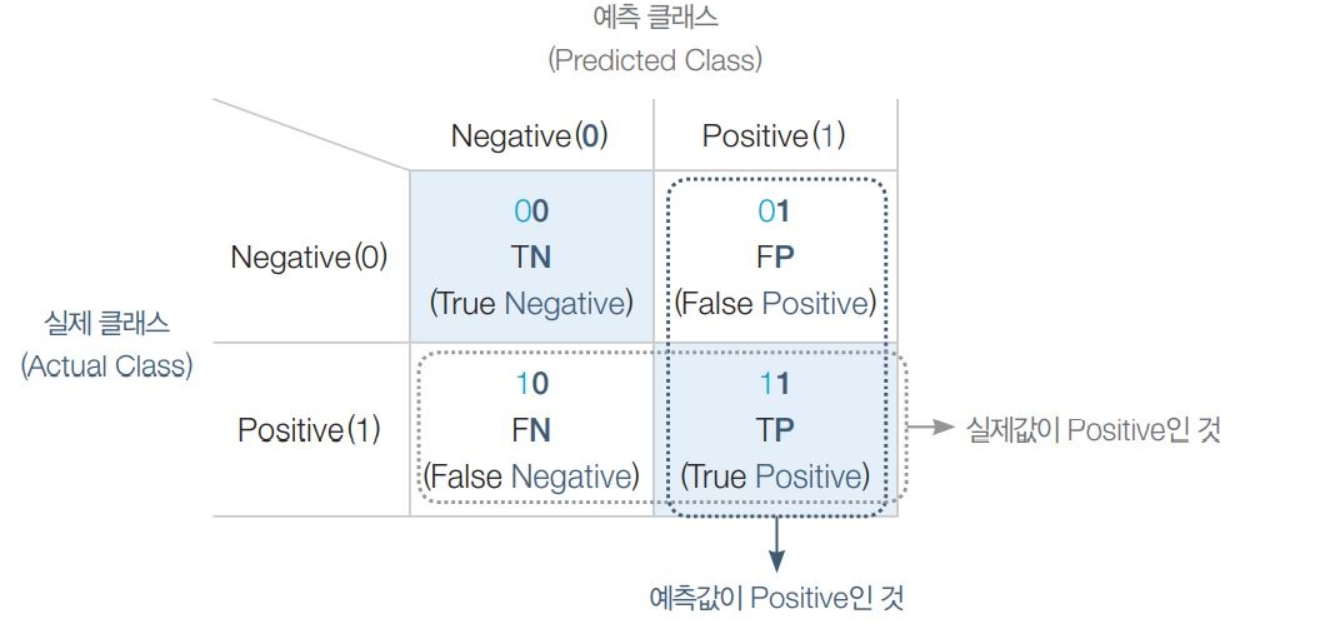



In [18]:
# Y_test, Y_predict에 대해 오차행렬 확인
confusion_matrix(Y_test, Y_predict)

# 예측과 실제가 일치: 107 + 60 = 167
# 예측과 실제가 다른: 1 + 3 = 4
# 결과: 예측이 꽤 잘 된 편,,!

array([[ 60,   3],
       [  1, 107]])

In [19]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

In [20]:
# Y_test, Y_predict에 대해 accuracy, precision, recall, f1 확인
print('accuracy: {0:.3f}, precision: {1:.3f}, recall: {2:.3f}, f1: {3:.3f}'.format(accuracy, precision, recall, f1))

accuracy: 0.977, precision: 0.973, recall: 0.991, f1: 0.982


In [21]:
# 예측해보기
lr_b_cancer.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([1])